# tSNE

참고: https://lovit.github.io/nlp/representation/2018/09/28/mds_isomap_lle/

In [1]:
import numpy as np

n_data_per_class = 50
n_classes = 3

x = []
y = []
for c in range(n_classes):
    x_ = 0.3 * np.random.random_sample((n_data_per_class, 2))
    x_ += np.random.random_sample((1, 2))
    x.append(x_)
    y.append(np.asarray([c] * n_data_per_class))
x = np.vstack(x)
y = np.concatenate(y)

In [2]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import export_png

output_notebook()

title = '{} classes {} points'.format(n_classes, n_classes * n_data_per_class)

def draw_figure(x, y, title, show_figure=True,
    colors = 'firebrick darksalmon lightseagreen'.split()):

    p = figure(width=400, height=400, title=title)
    for c in range(n_classes):
        idx = np.where(y == c)[0]
        x_ = x[idx]
        p.scatter(x_[:,0], x_[:,1], fill_color=colors[c], line_color=colors[c])
    if show_figure:
        show(p)
    return p

p = draw_figure(x, y, title)

Loading BokehJS ...

In [3]:
from sklearn.manifold import TSNE

plots = []
for perplexity in [2, 5, 10, 30, 100, 200]:
    z = TSNE(
        n_components=2,
        perplexity=perplexity
    ).fit_transform(x)
    title = 't-SNE with perplexity = {}'.format(perplexity)
    plots.append(draw_figure(z, y, title, show_figure=False))

gp = gridplot([[plots[0], plots[1]], [plots[2], plots[3]], [plots[4], plots[5]]])
show(gp)

* perplexity 가 지나치게 작은 2 일 때에는 LLE 처럼 지나치게 좁은 locality 만이 반영되어 왜곡된 공간이 학습
* Perplexity = 5 일 때에는 각 클래스별로 조금씩 뭉쳐져 있는 점들 끼리 그룹을 지었습니다. 하지만 그룹 간의 거리도 어느 정도 보존
* Perplexity 가 10 ~ 100 일 때에는 각 클래스 간 간격이 어느 정도 보존되었습을 알 수 있음
* perplexity = 200 처럼 매우 큰 값을 이용하면 점들 사이에 가깝고 먼 정보가 사라져 원 공간의 거리 정보가 보존되지 않음
* t-SNE 는 perplexity 에 크게 민감하게 반응하지 않고 안정적으로 원 공간의 구조를 보존함을 알 수 있음

## circles

In [4]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['royalblue', 'red', 'deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

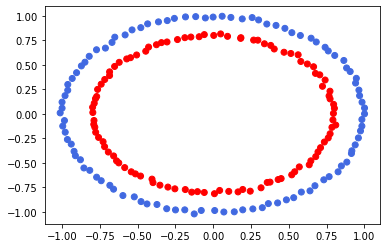

In [5]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 200, noise = 0.01)
plt.scatter(X[:,0], X[:,1], c = vectorizer(y))

In [6]:
tsne = TSNE(n_components = 2, perplexity = 5, random_state = 42)
X_5 = tsne.fit_transform(X)
tsne = TSNE(n_components = 2, perplexity = 40, random_state = 42)
X_40 = tsne.fit_transform(X)
tsne = TSNE(n_components = 2, perplexity = 100, random_state = 42)
X_100 = tsne.fit_transform(X)
tsne = TSNE(n_components = 2, perplexity = 1000, random_state = 42)
X_1000 = tsne.fit_transform(X)

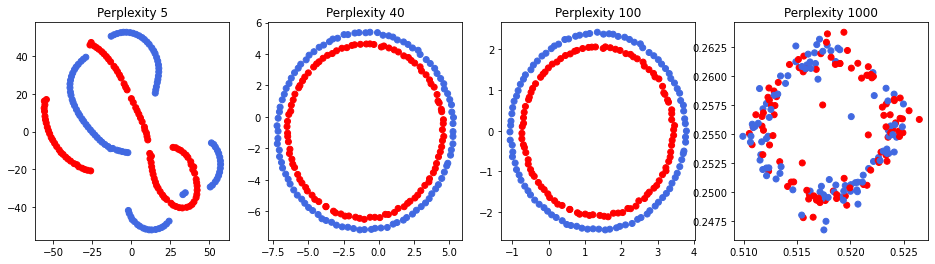

In [7]:
plt.figure(figsize = (16, 4))
plt.subplot(141)
plt.gca().set_title('Perplexity 5')
plt.scatter(X_5[:,0], X_5[:,1], c=vectorizer(y))

plt.subplot(142)
plt.gca().set_title('Perplexity 40')
plt.scatter(X_40[:,0], X_40[:,1], c=vectorizer(y))

plt.subplot(143)
plt.gca().set_title('Perplexity 100')
plt.scatter(X_100[:,0], X_100[:,1], c=vectorizer(y))

plt.subplot(144)
plt.gca().set_title('Perplexity 1000')
plt.scatter(X_1000[:,0], X_1000[:,1], c=vectorizer(y))


## mnist

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.95)

In [10]:
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X_train)

In [11]:
tsne = TSNE(n_components = 2, perplexity = 100, random_state = 42)
X_100 = tsne.fit_transform(X_train)

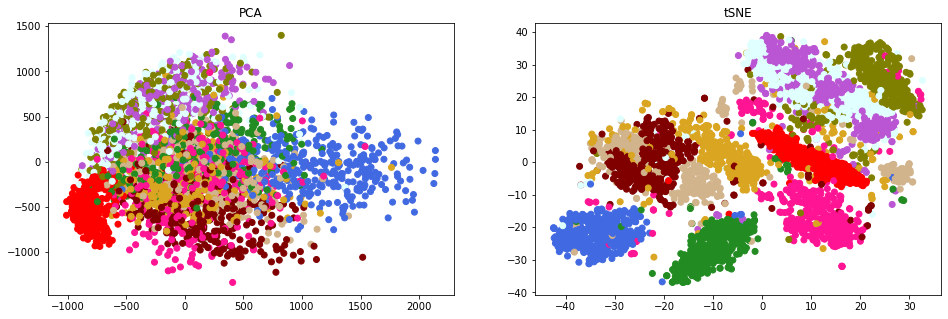

In [12]:
plt.figure(figsize = (16, 5))
ax1= plt.subplot(121)
plt.gca().set_title('PCA')
plt.scatter(X_PCA[:,0], X_PCA[:,1], c= vectorizer(y_train), label= colors)

ax1= plt.subplot(122)
plt.gca().set_title('tSNE')
plt.scatter(X_100[:,0], X_100[:,1], c= vectorizer(y_train), label= y_train)

In [13]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_train)

In [14]:
from sklearn.manifold import LocallyLinearEmbedding
LLE = LocallyLinearEmbedding(n_components=2, n_neighbors=20)
X_LLE = LLE.fit_transform(X_train)

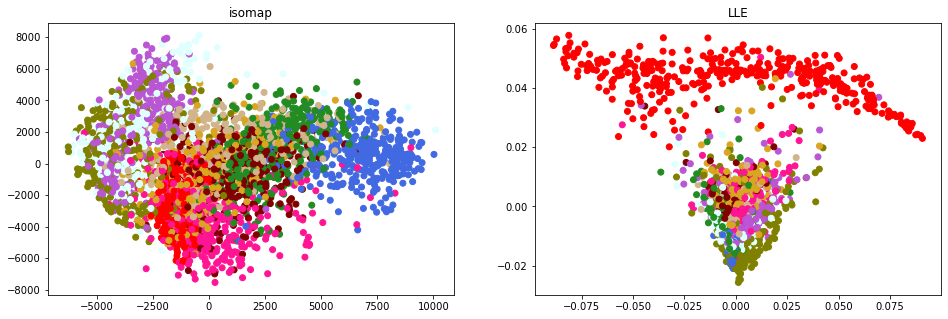

In [15]:
plt.figure(figsize = (16, 5))
ax1= plt.subplot(121)
plt.gca().set_title('isomap')
plt.scatter(X_isomap[:,0], X_isomap[:,1], c= vectorizer(y_train), label= colors)

ax1= plt.subplot(122)
plt.gca().set_title('LLE')
plt.scatter(X_LLE[:,0], X_LLE[:,1], c= vectorizer(y_train), label= y_train)

## swiss roll

In [16]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 42)

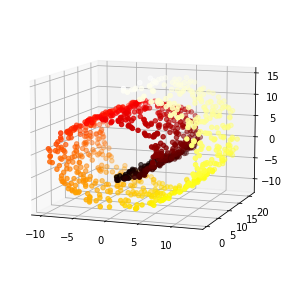

In [17]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = t, cmap = plt.cm.hot)
ax.view_init(10, -70)

In [18]:
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)
tsne = TSNE(n_components = 2, random_state = 42)
X_tsne = tsne.fit_transform(X)

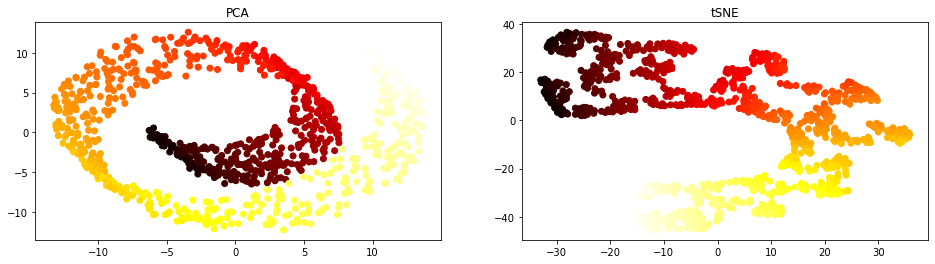

In [19]:
plt.figure(figsize = (16, 4))
plt.subplot(121)
plt.gca().set_title('PCA')
plt.scatter(X_PCA[:,0], X_PCA[:,1], c = t, cmap = plt.cm.hot)

plt.subplot(122)
plt.gca().set_title('tSNE')
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = t, cmap = plt.cm.hot)

In [20]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

In [21]:
LLE = LocallyLinearEmbedding(n_components=2, n_neighbors=15)
X_LLE = LLE.fit_transform(X)

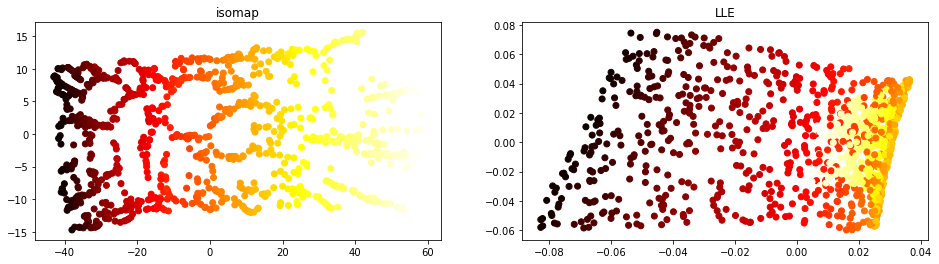

In [22]:
plt.figure(figsize = (16, 4))
plt.subplot(121)
plt.gca().set_title('isomap')
plt.scatter(X_isomap[:,0], X_isomap[:,1], c = t, cmap = plt.cm.hot)

plt.subplot(122)
plt.gca().set_title('LLE')
plt.scatter(X_LLE[:,0], X_LLE[:,1], c = t, cmap = plt.cm.hot)